In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import itertools

matplotlib.rc('font', family='Arial')

# Rem dropping function

In [2]:
with open('simulationResults/REM_uniform_1__0_1___2_5_07_queue_size_history.pkl', 'rb') as input:
    queue_history = pickle.load(input)

## Wartość oczekiwana długości kolejki


In [3]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]
avarage=np.average(history.queue_length,weights=history.state_duration)
avarage

0.59569853042413279

Wynik dokładny: w MG1N REM statoinary distribution for various distrbutions.nb

## stan stacjonarny

In [4]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]    
time_in_state_df=history.groupby(['queue_length']).sum()[["state_duration"]]  
time_in_state_df["state_probability"]=time_in_state_df.state_duration/time_in_state_df.state_duration.sum()
time_in_state_df[["state_probability"]]

state_probability
queue_length                   
0.0                    0.587246
1.0                    0.271721
2.0                    0.103967
3.0                    0.032503
4.0                    0.004280
5.0                    0.000283

porównaj z MG1N REM statoinary distribution for various distrbutions.nb

## wykres długości kolejki

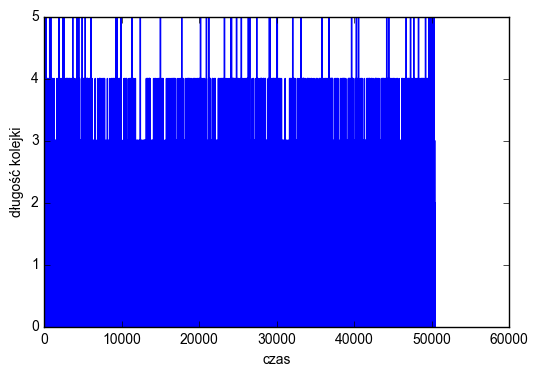

In [5]:
x, y = queue_history.T
plt.plot(x,y)
plt.xlabel(u"czas")
plt.ylabel(u"długość kolejki")
plt.savefig('pictures/queue_length_1.jpg')
plt.show()

## Rozkład liczby kolejno (seryjnie) traconych zgłoszeń

In [6]:
with open('simulationResults/REM_uniform_1__0_1___2_5_07_queue_acceptance_history.pkl', 'rb') as input:
    queue_acceptance = pickle.load(input)

In [7]:
acceptance_history = pd.DataFrame(data=queue_acceptance,columns=["arrival_time","was_accepted"]) 
numer_of_subsequent_rejections_list = [ sum( 1 for _ in group ) for key, group in itertools.groupby( acceptance_history.was_accepted.values ) if key == 0 ];
subsequent_rejections_df = pd.DataFrame(data = numer_of_subsequent_rejections_list, columns = ["subsequent_rejections"])
subsequent_rejections_distribution = pd.DataFrame(subsequent_rejections_df.subsequent_rejections.value_counts()/len(subsequent_rejections_df) )
subsequent_rejections_distribution

subsequent_rejections
1               0.846061
2               0.132121
3               0.018182
4               0.003636

In [8]:
 pd.DataFrame(subsequent_rejections_df.subsequent_rejections.value_counts()/len(acceptance_history))

subsequent_rejections
1               0.013974
2               0.002182
3               0.000300
4               0.000060

In [9]:
len(numer_of_subsequent_rejections_list)

825

In [10]:
queue_history

array([[  0.00000000e+00,   1.00000000e+00],
       [  8.87757000e-02,   2.00000000e+00],
       [  1.64965400e-01,   3.00000000e+00],
       ..., 
       [  5.03772722e+04,   1.00000000e+00],
       [  5.03776032e+04,   0.00000000e+00],
       [  5.03789447e+04,   1.00000000e+00]])

In [11]:
acceptance_history

arrival_time  was_accepted
0          0.000000           1.0
1          0.088722           1.0
2          0.164828           1.0
3          0.468113           0.0
4          1.016931           1.0
5          1.147974           1.0
6          1.550874           0.0
7          2.699759           1.0
8          2.927233           1.0
9          3.158517           1.0
10         3.427870           1.0
11         4.434133           1.0
12         5.633899           1.0
13         6.109668           1.0
14         7.478492           1.0
15         8.228992           1.0
16         9.453727           1.0
17         9.476667           1.0
18         9.635568           1.0
19         9.808071           1.0
20        11.312766           1.0
21        13.741267           1.0
22        13.839001           1.0
23        14.190033           1.0
24        14.472436           1.0
25        18.180515           1.0
26        20.600602           1.0
27        21.271552           1.0
28        21.331483           1.0
29        22.050849           1.0
...             ...           ...
49921  50345.879007           1.0
49922  50347.347141           1.0
49923  50348.781269           1.0
49924  50349.236018           1.0
49925  50350.790904           1.0
49926  50351.745345           1.0
49927  50352.546612           1.0
49928  50354.994671           1.0
49929  50357.972724           1.0
49930  50360.581740           1.0
49931  50360.622632           1.0
49932  50362.030849           1.0
49933  50362.139701           1.0
49934  50362.702032           1.0
49935  50362.726004           1.0
49936  50364.254977           1.0
49937  50364.421765           1.0
49938  50366.092829           1.0
49939  50366.747263           1.0
49940  50369.701365           1.0
49941  50370.476264           1.0
49942  50370.732319           1.0
49943  50370.858241           1.0
49944  50371.304113           1.0
49945  50375.284165           1.0
49946  50375.868878           1.0
49947  50376.047994           1.0
49948  50377.266139           1.0
49949  50378.927667           1.0
49950  50379.064341           1.0

[49951 rows x 2 columns]

In [12]:
acceptance_history = pd.DataFrame(data=queue_acceptance,columns=["arrival_time","was_accepted"]) 
numer_of_subsequent_rejections_list = [ [sum( 1 for _ in group ),key] for key, group in itertools.groupby( acceptance_history.was_accepted.values ) if key == 0 ];
numer_of_subsequent_rejections_list

[[1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [3, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],

In [13]:
 acceptance_history[acceptance_history["was_accepted"]==0]
    


arrival_time  was_accepted
3          0.468113           0.0
6          1.550874           0.0
79        69.774739           0.0
166      172.397101           0.0
235      241.246521           0.0
303      312.920614           0.0
474      473.958636           0.0
478      475.955583           0.0
491      485.869448           0.0
511      502.145183           0.0
604      613.411851           0.0
605      613.627965           0.0
682      699.083640           0.0
685      699.588475           0.0
826      841.911205           0.0
863      872.356688           0.0
883      890.221244           0.0
893      898.003786           0.0
1007    1008.171840           0.0
1010    1009.291595           0.0
1026    1020.071692           0.0
1054    1048.047721           0.0
1113    1101.202626           0.0
1117    1102.904586           0.0
1118    1103.045226           0.0
1187    1184.837250           0.0
1234    1236.951824           0.0
1259    1259.212015           0.0
1262    1260.489061           0.0
1466    1481.157351           0.0
...             ...           ...
48830  49244.161417           0.0
48933  49363.986895           0.0
48946  49376.281521           0.0
48998  49429.855174           0.0
49002  49430.567896           0.0
49020  49451.484369           0.0
49106  49545.754256           0.0
49217  49648.980549           0.0
49219  49649.288728           0.0
49299  49731.861032           0.0
49322  49753.917092           0.0
49384  49811.028088           0.0
49385  49811.368589           0.0
49388  49813.358275           0.0
49457  49889.558778           0.0
49458  49889.937554           0.0
49460  49891.510853           0.0
49500  49929.135787           0.0
49605  50040.386695           0.0
49608  50041.473590           0.0
49657  50091.882209           0.0
49659  50092.356597           0.0
49660  50093.335994           0.0
49661  50093.364925           0.0
49692  50130.199441           0.0
49808  50243.250379           0.0
49822  50251.655263           0.0
49823  50251.970013           0.0
49843  50266.797850           0.0
49851  50272.490225           0.0

[973 rows x 2 columns]

In [14]:
np.random.uniform(0, 1, 100000)

array([ 0.34210457,  0.92023053,  0.6237679 , ...,  0.74830137,
        0.99001205,  0.45388555])